##Dashboard Creation

We will learn how to create a dashboard to present the result of the analysis.

##[Scholastic Data Challenge](http://sc.aisnet.org/student-leadership-conference/student-chapter-comp/analytics-challenge/)

### What will the children’s book market look like in the future?

Scholastic is a major international publishing, educational, and media company with a focus on books and educational materials designed to support children’s literacy and cultivate a passion for reading and knowledge which will continue throughout life. Scholastic’s mission is driven by its credo LINK which articulates this goal for the company.

Scholastic has many different channels through which it distributes the books it publishes. At times these channels work collaboratively to reach new customers in different ways, but at times there can be significant overlap between these channels. Through analyzing the interactions of these channels Scholastic seeks to better understand the children’s book market, vis-a-vis demographics, geography, genre, and price.

In the spirit of Scholastic’s mission of cultivating learning, the provided data is presented in a realistic manner, as a small snapshot of Scholastic’s sales between two separate distribution channels across the nation. In an effort to make this a realistic scenario, the data presented is not fully cleaned and there are many additional interesting variables which it is the job of the analyst to identify and evaluate.

Start your analysis by answering question 1 below, and then answer at least one or more of the remaining questions.

1. What trends do you see in the data, among / demographics, genre/ theme, and price?
2. What does the data suggest about Scholastic’s distribution channels, and how would you recommend structuring a distribution strategy?
3. What other publically available data can you append (Census, state, region, etc.), to provide further insight?
4. Formulate a unified strategy for marketing between the two channels. Where are there areas of significant overlap between the channels, and what strategy do you suggest to prevent unintentional competition between channels?

Below are all features in this dataset

- Title: Title of product sold
- TITLE_CODE: Unique ID for titles
- CHANNEL: Masked channel description of channel through which the product was distributed to the customer
- PROD_TYP: Indicator if the product is a paperback or hardback
- SERIES: Y/N indicator if the product is part of a series
- CH1_GENRE: Genre listing for product from Channel 1 database
- CH1_THEME: Theme listing for product from Channel 1 database
- CH2_CATEGORY: Category listing for product from Channel 2 database
- CH2_SUBCATEGORY: Subcategory listing for product from Channel 2 database
- LEXILE_11_DESC: Lexile measures for product. Note this field is not always complete for every Scholastic product. For more information on Lexile codes, see links below:
 - : https://lexile.com/educators/measuring-growth-with-lexile/lexile-measures-grade-equivalents/
 - : https://lexile.com/educators/find-books-at-the-right-level/about-lexile-codes/
- total_units: Number of products sold 
- UNIT_PRICE: Unit price of product sold
- SCHOOL_TYPE: Indicator if the school where the product was sold was public or not.
- REGION: Region of the United States where product was distributed - NORTHEAST, MIDWEST, SOUTH, WEST, or OTHER
- STATE: US state of sale
- COUNTY: County of sale
- EDU_NO_HS: % of population with no HS degree, by zip code
- EDU_HS_SOME_COLLEGE: % of population with some college, by zip code
- EDU_BACHELOR_DEG: % of population with bachelor degree, by zip code
- EDU_GRADUATE_DEG: % of population with graduate degree, by zip code
- HHI_BAND: Bands of household income for zip code, in $10,000 bands
- ZIP_CODE: Zip code of sale

In this exercise, we will perform an exploratory analysis of the dataset. The following activities will be performed:
- read the dataset into spark (I had to change delimiter from comma to pipe.)
- run various exploratory analysis to understand better
- conduct ETL analysis
- run various queries to address the questions in this challenge

In [0]:
%fs ls /mnt/isa460/data/scholastic

path,name,size
dbfs:/mnt/isa460/data/scholastic/sdata.csv,sdata.csv,421879198
dbfs:/mnt/isa460/data/scholastic/state_abbrev.csv,state_abbrev.csv,1167
dbfs:/mnt/isa460/data/scholastic/us_county_population.csv,us_county_population.csv,3644730


####Load the dataset

In [0]:
scholastic=spark.read.option("delimiter", "|").csv("/mnt/isa460/data/scholastic/sdata.csv", header=True, inferSchema=True)

scholastic.createOrReplaceTempView("BooksTable")


1. Calculate the total books sold and total sales by each channel

In [0]:
%sql
select channel, sum(total_units) as total_quantity, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel
order by total_sales desc


channel,total_quantity,total_sales
CHANNEL 2,1868272,1.100396478E7
CHANNEL 1,1218664,7533980.06


2.Calculate the total sales by state

Refine the result and remove invalid states.

Import a table with valid state abbreviation

In [0]:
state_abbrev=spark.read.option("delimiter", "|").csv("/mnt/isa460/data/scholastic/state_abbrev.csv", header=True, inferSchema=True)

state_abbrev.createOrReplaceTempView("stateTable")



In [0]:
%sql
select b.state, sum(total_units*unit_price) as total_sales
from BooksTable b
inner join stateTable s on b.state=s.state_abbrev
group by b.state
order by total_sales DESC

state,total_sales
CA,2248928.5399977313
TX,1597040.559998641
FL,1061997.759999032
IL,830983.329999509
PA,801505.6599995478
NY,798799.6899995069
MI,654134.5999998045
GA,600415.6599998827
OH,564925.4099999106
IN,532641.3499999231


3.Calculate the total_sales by channel and product type.

In [0]:
%sql
select channel, prod_typ as product_type, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel, product_type
order by total_sales desc

channel,product_type,total_sales
CHANNEL 2,PAPERBACK,9948612.24
CHANNEL 1,PAPERBACK,5609680.57
CHANNEL 1,HARDBACK,1924299.49
CHANNEL 2,HARDBACK,1055352.54


4.What are the most popular books (top 10) sold in each channel?

In [0]:
%sql
select channel, title, total_books, rank
from (
 select channel, title, sum(total_units) as total_books, rank() over(partition by channel order by sum(total_units) desc) as rank
 from BooksTable
 group by channel, title) t1
where rank<=10


channel,title,total_books,rank
CHANNEL 1,Dog Man: Lord of the Fleas,35953,1
CHANNEL 1,"I Survived the Attack of the Grizzlies, 1967",15981,2
CHANNEL 1,Pete the Cat and the Missing Cupcakes,11296,3
CHANNEL 1,"Collector, The",10417,4
CHANNEL 1,Pig the Star,10386,5
CHANNEL 1,"Three Little Superpigs, The",10315,6
CHANNEL 1,Search for the Mermicorn,10189,7
CHANNEL 1,Princess Ponies Pumpkin Ghost w/ Charm,10076,8
CHANNEL 1,Kristy's Big Day,8996,9
CHANNEL 1,There Was an Old Lady Who Swallowed a Cow,8968,10


5.What are top 10 genre?

remove stopword

In [0]:
%sh pip install nltk

Collecting nltk
 Downloading nltk-3.6.3-py3-none-any.whl (1.5 MB)
Collecting regex
 Downloading regex-2021.9.24-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (763 kB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Collecting click
 Downloading click-8.0.1-py3-none-any.whl (97 kB)
Collecting tqdm
 Downloading tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
Installing collected packages: regex, click, tqdm, nltk
Successfully installed click-8.0.1 nltk-3.6.3 regex-2021.9.24 tqdm-4.62.3
WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# convert a list to data frame
from pyspark.sql.types import StringType

stop_df=spark.createDataFrame(stop, StringType()).withColumnRenamed("value", "word")

# create a SQL table
stop_df.createOrReplaceTempView("stopword")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
%sql
select word2 as word, count(*) as frequency
from (
  select title, explode(split(lower(title)," ")) as word, translate(word, ':',"") as word2
  from bookstable) temp
left join stopword s on temp.word2=s.word
where s.word is null
group by word2
order by frequency desc
limit 100


word,frequency
pete,83534
cat,76391
dog,60835
little,50727
old,49886
man,49602
swallowed,47029
day,43664
world,43411
big,42133


## Visulize top words using Word Cloud

In [0]:
%sql
create temp view topwords as
select word2 as word, count(*) as frequency
from (
  select title, explode(split(lower(title)," ")) as word, translate(word, ':',"") as word2
  from bookstable) temp
left join stopword s on temp.word2=s.word
where s.word is null
group by word2
order by frequency desc
limit 100

In [0]:
# convert a emp view/table to data frame
topwords_df = sqlContext.table("topwords")

#convert data frame to pandas
pd=topwords_df.toPandas()

In [0]:
%sh pip install wordcloud

Collecting wordcloud
 Downloading wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Collecting pillow
 Downloading Pillow-8.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Installing collected packages: pillow, wordcloud
Successfully installed pillow-8.3.2 wordcloud-1.8.1
WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

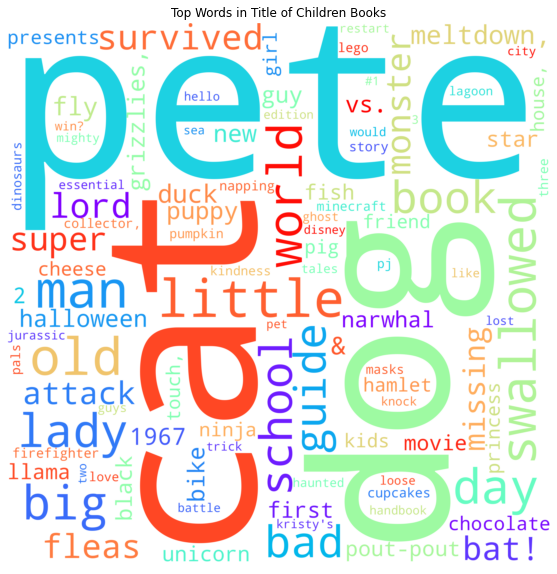

In [0]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt 

# create the WordCloud object
wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=False, background_color='white',colormap='rainbow')

# generate the word cloud
result_dict=dict(zip(pd["word"], pd['frequency']))
wordcloud.generate_from_frequencies(result_dict)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Words in Title of Children Books")
plt.axis('off')
plt.show()